# FordGoBike Data Exploration
## by Omar Mo'men

## Preliminary Wrangling

This document explores a dataset containing different attributes for approximately 5 millions bike rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import geopy.distance

%matplotlib inline

In [2]:
# load in all the datasets for all months, and store all datasets in a list of dataframes
data_dfs = []
for file in os.listdir("./data files"):
    if file.endswith(".csv"):
        print(file)
        file = os.path.join('./data files',file)
        df = pd.read_csv(file)
        data_dfs.append(df)

201912-baywheels-tripdata.csv


/home/omar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


201810-fordgobike-tripdata.csv
201907-baywheels-tripdata.csv
201903-fordgobike-tripdata.csv
201801-fordgobike-tripdata.csv
201904-fordgobike-tripdata.csv
201811-fordgobike-tripdata.csv
201802-fordgobike-tripdata.csv
201902-fordgobike-tripdata.csv
201804-fordgobike-tripdata.csv
201908-baywheels-tripdata.csv
201910-baywheels-tripdata.csv
201906-baywheels-tripdata.csv


/home/omar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


201812-fordgobike-tripdata.csv
201807-fordgobike-tripdata.csv
201905-baywheels-tripdata.csv
201806-fordgobike-tripdata.csv
201808-fordgobike-tripdata.csv
201809-fordgobike-tripdata.csv
2017-fordgobike-tripdata.csv
201803-fordgobike-tripdata.csv
201911-baywheels-tripdata.csv
202001-baywheels-tripdata.csv
201805-fordgobike-tripdata.csv
201901-fordgobike-tripdata.csv
201909-baywheels-tripdata.csv


In [3]:
#Check all cols in all dfs to make sure that all the dfs contain the same number of cols
all_dfs_cols = []
for df in data_dfs:
    all_dfs_cols.append(list(df))
all_dfs_cols = pd.Series(all_dfs_cols)
all_dfs_cols.value_counts()

[duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip]                          20
[duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, rental_access_method]     5
[duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type]                                                    1
dtype: int64

In [4]:
#Drop the 2 cols that don't present in some dfs, as they are not very important to the analysis
for df in data_dfs:
    if 'bike_share_for_all_trip' in list(df):
        df.drop(columns=['bike_share_for_all_trip'], inplace=True)
    if 'rental_access_method' in list(df):
        df.drop(columns=['rental_access_method'], inplace=True)

In [5]:
#Test the last tidness issue
all_dfs_cols = []
for df in data_dfs:
    all_dfs_cols.append(list(df))
all_dfs_cols = pd.Series(all_dfs_cols)
all_dfs_cols.value_counts()

[duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type]    26
dtype: int64

In [6]:
#Add all dfs in only one df
i = 1
for df in data_dfs:
    print('Dataframe ', i, ' is being added ...' )
    data_dfs[0] = data_dfs[0].append(df, ignore_index=True)
    print('Done')
    i = i + 1

Dataframe  1  is being added ...
Done
Dataframe  2  is being added ...
Done
Dataframe  3  is being added ...
Done
Dataframe  4  is being added ...
Done
Dataframe  5  is being added ...
Done
Dataframe  6  is being added ...
Done
Dataframe  7  is being added ...
Done
Dataframe  8  is being added ...
Done
Dataframe  9  is being added ...
Done
Dataframe  10  is being added ...
Done
Dataframe  11  is being added ...
Done
Dataframe  12  is being added ...
Done
Dataframe  13  is being added ...
Done
Dataframe  14  is being added ...
Done
Dataframe  15  is being added ...
Done
Dataframe  16  is being added ...
Done
Dataframe  17  is being added ...
Done
Dataframe  18  is being added ...
Done
Dataframe  19  is being added ...
Done
Dataframe  20  is being added ...
Done
Dataframe  21  is being added ...
Done
Dataframe  22  is being added ...
Done
Dataframe  23  is being added ...
Done
Dataframe  24  is being added ...
Done
Dataframe  25  is being added ...
Done
Dataframe  26  is being added ...


In [7]:
data_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336360 entries, 0 to 5336359
Data columns (total 13 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
dtypes: float64(6), int64(2), object(5)
memory usage: 529.3+ MB


In [8]:
#Store the combined df in a variable outside the list
df = data_dfs[0]

In [9]:
#Show attributes that conatins null values
for i in list(df):
    n = df[i].isnull().sum()
    print(i, ' --> ', n)

duration_sec  -->  0
start_time  -->  0
end_time  -->  0
start_station_id  -->  263092
start_station_name  -->  261907
start_station_latitude  -->  0
start_station_longitude  -->  0
end_station_id  -->  265940
end_station_name  -->  264809
end_station_latitude  -->  0
end_station_longitude  -->  0
bike_id  -->  0
user_type  -->  0


In [10]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,5.336360e+06,5.073268e+06,5.336360e+06,5.336360e+06,5.070420e+06,5.336360e+06,5.336360e+06,5.336360e+06
mean,8.513805e+02,1.325853e+02,3.776468e+01,-1.223508e+02,1.294636e+02,3.776419e+01,-1.223480e+02,3.466773e+04
std,2.329766e+03,1.141700e+02,1.301003e-01,2.825034e-01,1.133479e+02,2.030391e-01,5.787351e-01,1.337778e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,3.700000e+01,3.777008e+01,-1.224124e+02,3.100000e+01,3.777041e+01,-1.224114e+02,1.533000e+03
50%,5.690000e+02,9.300000e+01,3.778079e+01,-1.223984e+02,9.200000e+01,3.778101e+01,-1.223981e+02,2.952000e+03
75%,8.880000e+02,2.030000e+02,3.779539e+01,-1.222948e+02,2.000000e+02,3.779539e+01,-1.222948e+02,5.474000e+03
max,9.121100e+05,5.060000e+02,4.551000e+01,0.000000e+00,5.060000e+02,4.551000e+01,0.000000e+00,9.999520e+05


### What is the structure of your dataset?

> The combined dataset is very extensive, it includes 5,705,957 rides from June 2017 to January 2020, with 13 attributes defining each ride as follow: 

- 3 Ride Timing attributes:
        duration_sec (Numerical)
        start_time (Time series)
        end_time (Time series)

- 4 Ride starting point attibutes
        start_station_id (Nominal)
        start_station_name (Nominal)
        start_station_latitude (Numerical)
        start_station_longitude (Numerical)

- 4 Ride end point attibutes
        end_station_id (Nominal)
        end_station_name (Nominal)
        end_station_latitude (Numerical)
        end_station_longitude (Numerical)

- bike_id (Nominal)

- user_type (Nominal)

### What is/are the main feature(s) of interest in your dataset?

> I am interested to visualize the relationship between duration of the trip and the covered distance, also the affect of user type on duration and distance of trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `duration_sec`, `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`, `user_type`

## Univariate Exploration

> In this section, I am investigating distributions of individual variables, and do any required cleaning tasks for noticed issues before investigating bivariate relations.

##### Investigating the distribution of duration in seconds over the whole dataset

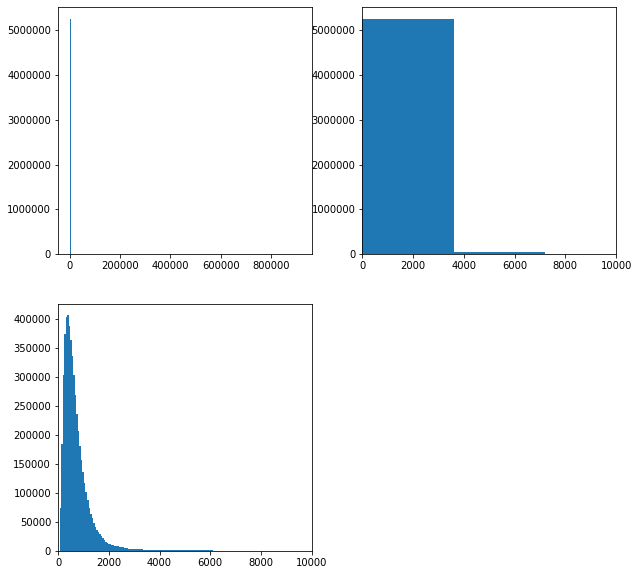

In [11]:
# using different bin sizes and zooming on narrower parts
binsize = 60*60
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)

plt.figure(figsize = [10, 10])

plt.subplot(2, 2, 1)
plt.hist(data=df, x='duration_sec', bins=bins);

plt.subplot(2, 2, 2);
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xlim(0, 1e4);

binsize = 60
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)
plt.subplot(2, 2, 3);
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xlim(0, 1e4);

> The previous graphs show that duration has very large points that makes the plot very skewed, so I will use log scale on x-axis to normalize the distribution.

In [12]:
df.duration_sec.sort_values(ascending=False)[:1000]

124395     912110
274497     912110
4572481    811077
3773597     86369
1577025     86366
            ...  
3045254     73601
1104769     73591
3334316     73565
1104770     73555
4017204     73537
Name: duration_sec, Length: 1000, dtype: int64

In [13]:
df.duration_sec.sort_values()[:1000]

4717394    60
4745903    60
721319     60
4637973    60
124824     60
           ..
1564670    62
2637077    62
5229950    62
2618915    62
1225484    62
Name: duration_sec, Length: 1000, dtype: int64

> Obviously, the largest 2 values are extreme outliers, it's not even logical to have a ride for 9 or 10 days, so I will exclude these two values, also it is noticed the lowest duration is 60 seconds.

In [14]:
912110/60/60/24, 811077/60/60/24, 86369/60/60/24

(10.556828703703705, 9.387465277777778, 0.9996412037037037)

In [15]:
df_improved = df[df.duration_sec < 90000]

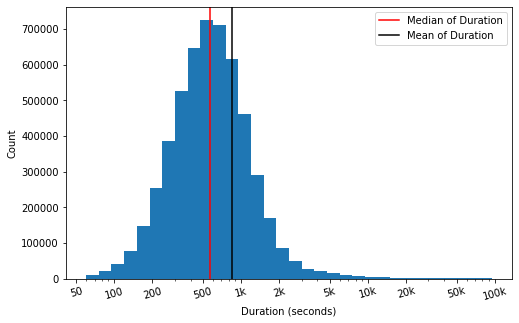

In [16]:
log_binsize = 0.1
bins = 10 ** np.arange(np.log10(60), np.log10(df_improved.duration_sec.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_improved, x = 'duration_sec', bins = bins);
plt.xscale('log');
plt.xlabel('Duration (seconds)');
ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
ticks_labels = ['50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '100k']
plt.xticks(ticks, ticks_labels, rotation=15);
med = plt.axvline(x=df_improved.duration_sec.median(), c='red');
mean = plt.axvline(x=df_improved.duration_sec.mean(), c='black');
plt.ylabel('Count')
plt.legend((med, mean), ('Median of Duration', 'Mean of Duration'))
plt.show();

In [17]:
df_improved.duration_sec.median(), df_improved.duration_sec.mean()

(569.0, 850.8871527898152)

> This plot shows that the duration distribution is skewed to the right, where the minimum is 60 seconds and the maximum is somewhere around 86k seconds, this skewness affect the mean to move apart from the median to the right.

---------------------------

-----------------------

##### Investigating the starting and ending stations frequency

In [18]:
df_improved.start_station_id.nunique()

453

In [19]:
df_improved.end_station_id.nunique()

453

In [20]:
df_cp = df_improved.copy()

In [21]:
df_cp = df_cp[df_cp.start_station_name.isnull()==False]

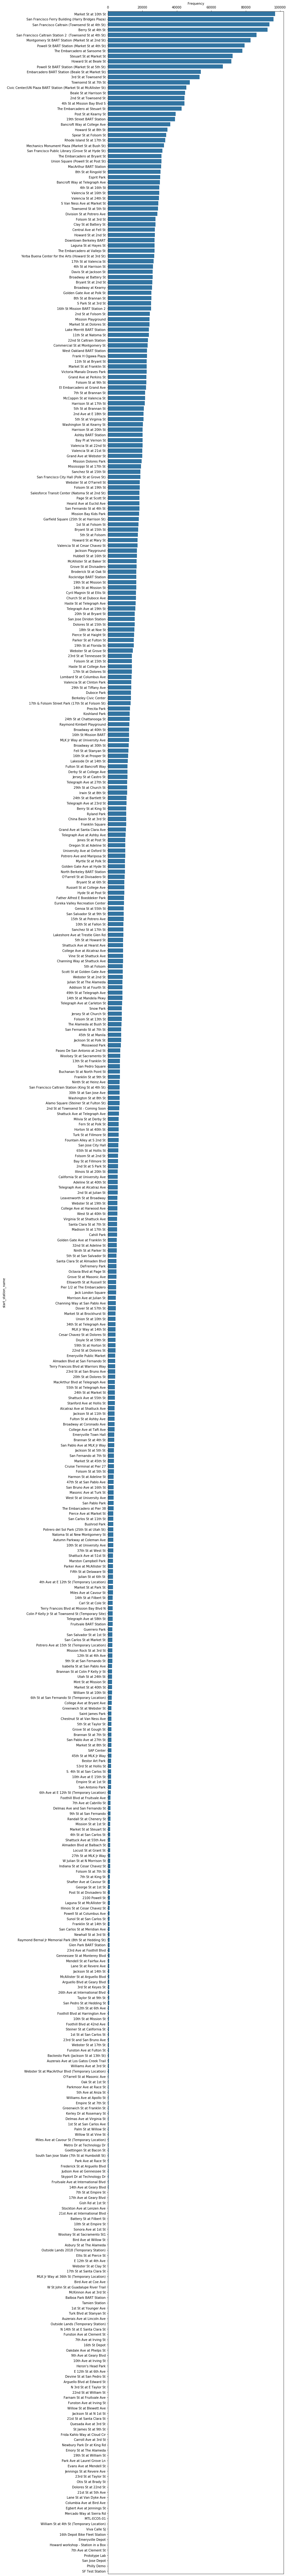

In [22]:
plt.figure(figsize=[10,150])
base_color = sb.color_palette()[0];
ax = sb.countplot(data = df_cp, y = 'start_station_name', color = base_color, order=df_cp.start_station_name.value_counts().index);
ax.xaxis.tick_top();
ax.set_xlabel('Frequency')    
ax.xaxis.set_label_position('top') 

In [23]:
df_cp = df_improved.copy()

In [24]:
df_cp = df_cp[df_cp.end_station_name.isnull()==False]

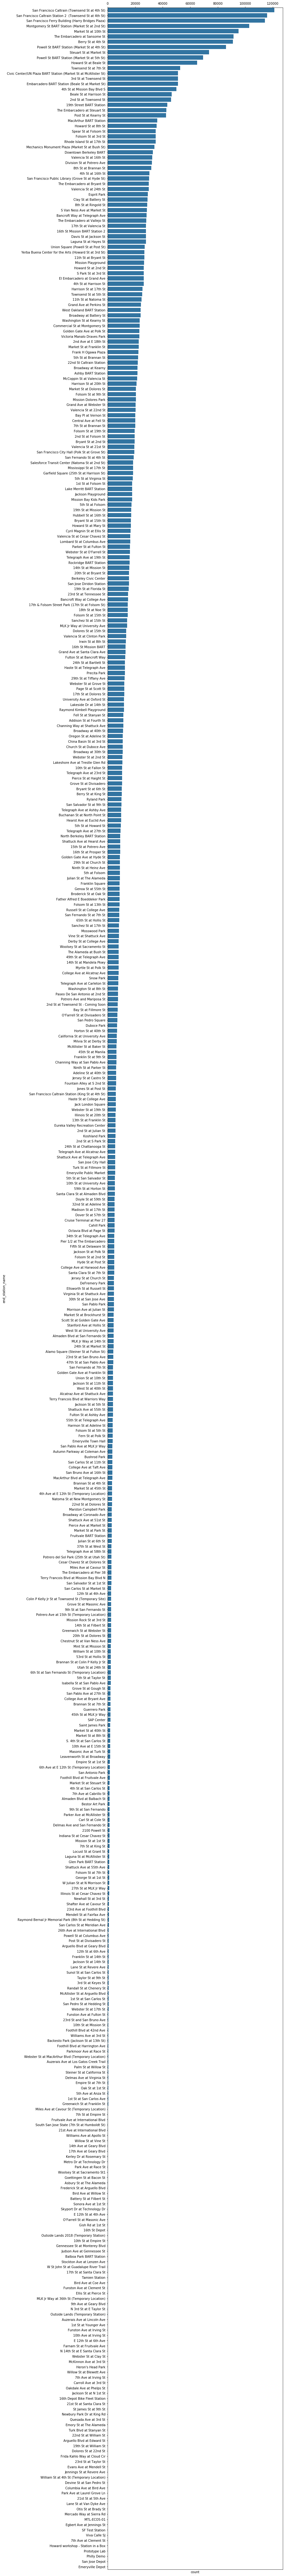

In [25]:
plt.figure(figsize=[10,150])
base_color = sb.color_palette()[0];
ax = sb.countplot(data = df_cp, y = 'end_station_name', color = base_color, order=df_cp.end_station_name.value_counts().index);
ax.xaxis.tick_top();

-------------------------

##### Investigating the user_type distribution

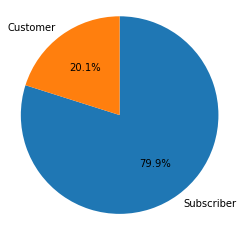

In [26]:
sorted_user_type = df_improved.user_type.value_counts()
plt.pie(sorted_user_type, labels = sorted_user_type.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square');

> More than 80% of the rides are conducted by subscribers rather than customers

##### Investigating the distance distribution

> The distance cut by each ride is not provided in this dataset, however the coordinates of starting and ending points are provided, so I will create a function that get the distance between two coordinates and apply it to the rides coordinates cols

In [27]:
def get_distance(ride):
    coords_1 = [ride.start_station_latitude, ride.start_station_longitude]
    coords_2 = [ride.end_station_latitude, ride.end_station_longitude]
    return geopy.distance.geodesic(coords_1, coords_2).km

In [28]:
# df_improved['distance'] = df_improved.apply(get_distance, axis=1)

> Running the previous line of code took more than 50 mins to run, because it is calculating the distance (using a sophisticated mathmatical equation) between two points for more than 5 millions times

> To avoid all this time, I will just take a sample of 10,000 rides and get their distances so I can investigate the rides distances distribtion.

In [29]:
samples = np.random.choice(df_improved.shape[0], 10000, replace = False);
df_samp = df_improved.loc[samples,:];

In [30]:
df_samp['distance_km'] = df_samp.apply(get_distance, axis=1)

In [31]:
df_samp.distance_km.isnull().sum()

0

In [32]:
df_samp.distance_km.describe()

count    10000.000000
mean         1.633506
std          1.049947
min          0.000000
25%          0.886047
50%          1.412757
75%          2.161867
max         10.557530
Name: distance_km, dtype: float64

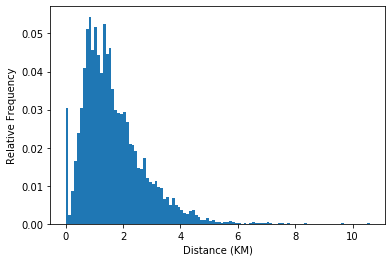

In [33]:
bins = np.arange(0, df_samp.distance_km.max()+0.1, 0.1)

plt.hist(data=df_samp, x='distance_km', bins=bins, weights=np.zeros_like(df_samp.distance_km) + 1. / df_samp.shape[0]);

plt.xlabel('Distance (KM)');

plt.ylabel('Relative Frequency')

plt.show();

> The distribution skewed to the right, but there is large frequency at zero, which probably relates to uncomplete rides, or a ride that started and finished at same point. 

> Actually this variable distance is not accurately defined, it should be called `displacement` for more scientific accuracy.

## Bivariate Exploration

> In this section, I am investigating relationships between pairs of variables in the data. 

In [34]:
df_improved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5336357 entries, 0 to 5336359
Data columns (total 13 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
dtypes: float64(6), int64(2), object(5)
memory usage: 730.0+ MB


In [35]:
numeric_vars = ['duration_sec', 'distance_km']
categoric_vars = ['user_type']

##### Investigating the relations between numerical vars

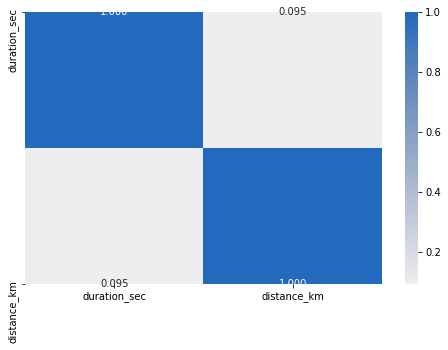

In [36]:
# correlation plot
plt.figure(figsize = [8, 5]);
sb.heatmap(df_samp[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.show();

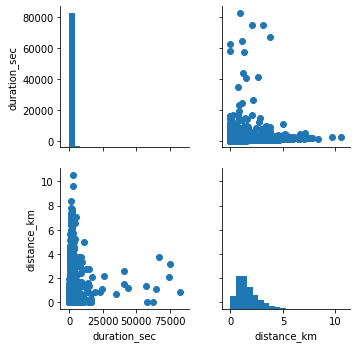

In [37]:
g = sb.PairGrid(data = df_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

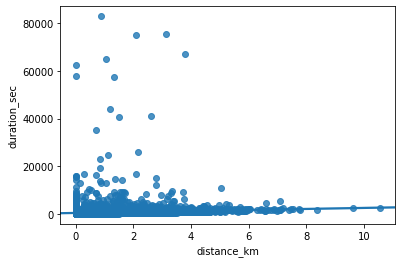

In [38]:
sb.regplot(data = df_samp, x = 'distance_km', y = 'duration_sec');

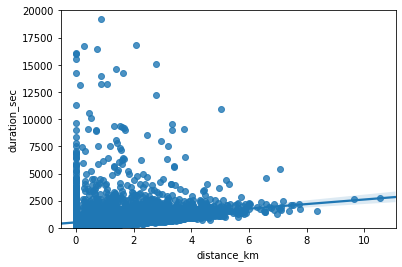

In [39]:
sb.regplot(data = df_samp, x = 'distance_km', y = 'duration_sec');
plt.ylim(0,20000);

> The correlation looks postive and strong on the graph except for points of zero distance that have large distance values, and this supports our assumption, that the rides that have zero distance maybe due to the fact that the ride started at a point and moved for long distance and then returned again to the same point.

##### Investigating the relations between numerical and categorical vars

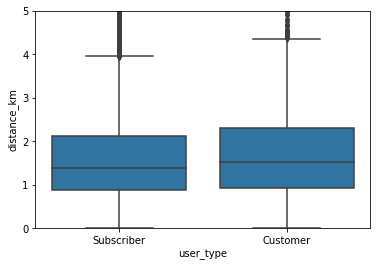

In [40]:
sb.boxplot(data = df_samp, x = 'user_type', y = 'distance_km', color = base_color);
plt.ylim(0,5);

> The customers are having more deviated distribution of distance covered, and also slightly higher median.

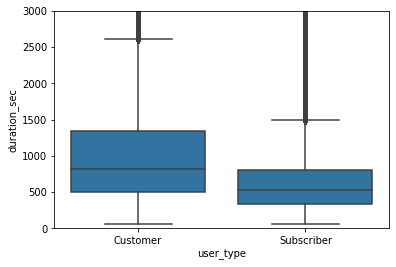

In [41]:
sb.boxplot(data = df_improved, x = 'user_type', y = 'duration_sec', color = base_color);
plt.ylim(0,3000);

> The customers are having more deviated distribution of rides duration covered, and also higher median.

##### Investigating the starting time frequency in each month

In [42]:
df_improved.start_time[0]

'2019-12-31 14:28:50.2860'

In [43]:
# Change the type of time to be datetime type
df_improved.start_time = pd.to_datetime(df_improved.start_time)
df_improved.end_time = pd.to_datetime(df_improved.end_time)

/home/omar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
df_improved.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5336357 entries, 0 to 5336359
Data columns (total 13 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
dtypes: datetime64[ns](2), float64(6), int64(2), object(3)
memory usage: 730.0+ MB


In [45]:
# Copy the current df to another one so we can change the indexing without affecting the original dataset we are dealing with.
df_time_indexed = df_improved.copy()

In [46]:
# Group by month, and count number of rides per each month.
df_time_indexed.index = df_time_indexed['start_time']
rides_per_month = df_time_indexed.resample('M').duration_sec.count()

In [47]:
rides_per_month

start_time
2017-06-30      2689
2017-07-31     44073
2017-08-31     83292
2017-09-30     98558
2017-10-31    108937
2017-11-30     95612
2017-12-31     86539
2018-01-31     94802
2018-02-28    106718
2018-03-31    111382
2018-04-30    131169
2018-05-31    179125
2018-06-30    195968
2018-07-31    199222
2018-08-31    192162
2018-09-30    186217
2018-10-31    201458
2018-11-30    134135
2018-12-31    131363
2019-01-31    192082
2019-02-28    183412
2019-03-31    256299
2019-04-30    239111
2019-05-31    182163
2019-06-30    191772
2019-07-31    258102
2019-08-31    210563
2019-09-30    217986
2019-10-31    239895
2019-11-30    185496
2019-12-31    300202
2020-01-31    295853
Freq: M, Name: duration_sec, dtype: int64

In [48]:
# First month has very small value, it can be due to incomplete data for this month, let's exclude it
rides_per_month = rides_per_month[1:]

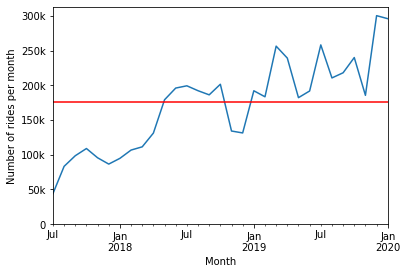

In [49]:
# Plot a time line graph that shows the number of rides per month
rides_per_month.plot();
plt.xlabel('Month')
plt.ylabel('Number of rides per month')
plt.yticks(np.arange(0, 35e4, 5e4), ['0', '50k', '100k','150k','200k','250k','300k']);
plt.axhline(y=rides_per_month[1:].mean(), c='red');

> 2019 is showing an obvious success over 2018, however, December is always showing weak results, this maybe due to holidays.

-----------------------------

## Multivariate Exploration

> In this section, I am investigating relationships involving more than 2 variables.

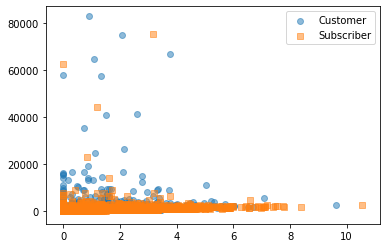

In [50]:
cat_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

for cat, marker in cat_markers:
    df_cat = df_samp[df_samp['user_type'] == cat];
    plt.scatter(data = df_cat, x = 'distance_km', y = 'duration_sec', marker = marker, alpha=0.5);
plt.legend(['Customer','Subscriber']);

> There is no noted difference between both user types (subscriber and customer) in terms of relation between distance and duration, however the subscribers points occurs many times more than the customer points.

##### The dataset is not very rich in terms of attributes, which didn't help me investigating various relations in this project.